In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'https://raw.githubusercontent.com/gagan-iitb/DataAnalyticsAndVisualization/refs/heads/main/Lab-W25/dataset/Person_Data.xlsx' # Update with the correct file path
df = pd.read_excel(file_path, sheet_name="Sheet1")

df.head()

,Sno,Person,Attributes,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1.0,A,Funny,Mature,Understanding,Kind,Short tempered,Intellegent,Hard working,Ambitions,...,Caring,Emotionaally Distant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Dad,Hard working,Caring,Progressive Mind,Honest,Holy Person,Loyal,Trustwarthy,Self Confidance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Mother,Loving,Helping,Emotional,Strong,Short tempered,Short Height,Hard working,Best Cook,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beautiful
3,4.0,Rohit,Professional,Casual in study,Low Marks,shortcut study,Humorous,standup comedian,makes fun of everyone,Helpful,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,B,Voilent,Kind,Handsome,Funny,Intelligent,Sportsman,Slim,Romantic,...,Writer,Honest,Rich,Caring,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import pandas as pd

# Step 1: Shift non-NaN values to the left
for index, row in df.iterrows():
    non_nan_values = row.dropna().values
    num_nans = row.isna().sum()
    df.iloc[index] = list(non_nan_values) + [None] * num_nans

# Step 2: Sort each row alphabetically
for index, row in df.iterrows():
    sorted_values = sorted(row.dropna().astype(str).values)
    num_nans = row.isna().sum()
    df.iloc[index] = list(sorted_values) + [None] * num_nans

# Step 3: Sort the rows by the number of non-NaN values (most filled at the top)
df['num_non_nan'] = df.notna().sum(axis=1)
df.sort_values(by='num_non_nan', ascending=False, inplace=True)
df.drop(columns=['num_non_nan'], inplace=True)

# Step 4: Drop columns where all values are NaN
df.dropna(axis=1, how='all', inplace=True)

# The dataframe is now cleaned, sorted by row and column alphabetically
df.head()

<ipython-input-5-ef650feb5360>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[index] = list(sorted_values) + [None] * num_nans


,Sno,Person,Attributes,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
15,16.0,163.5 Cm,40 Years,62 Kg,Bindi: true,Children: 2,Earring: True,Eye: Dark Brown,Fav Color: Yellow,Fav Food: Upma,Glasses: True,H,H Color: Black,Hair Type: Silky,Job: Asstt Professor,Married,Skin Type: Dry,Skintone: Pale,Working: True
21,21.0,AE,Sweet,caring,coward,cry often,cute,foodie,girl,happy,intelligent,loving,mischievious,naughty,painter,pretty,sister,small,None
6,7.0,C,Compromising,Funny,Good Memory,Helping,Rich,Smart,Supportive,Understanding,agrees to everything,no emotions,reasonable,relational,selfless,simple,None,None,None
27,27.0,AK,Good cook,beutiful,decision making,emotional,fearless,good dressing,hairstylist,humour,intelligent,introvert,knowledge,singer,sketcher,strong,None,None,None
28,28.0,Beautiful,Radhika,best cook,caring,friend,hardworking,helping,inspiring,loving,motivator,patience,sacrifice,strength,strong,support,None,None,None


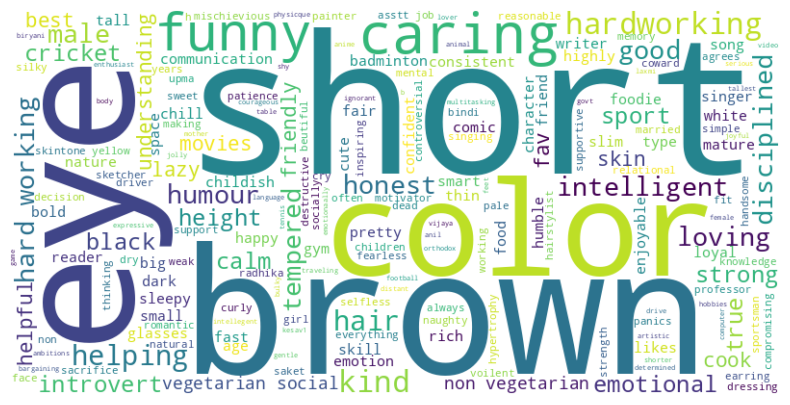

In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = df.iloc[:, 2:].values.flatten()
text_data = [str(i).strip() for i in text_data if str(i).strip().lower() not in [None, 'none', 'nan', '', 'kg', 'cm', 'animal', 'low', 'upma', 'sister', '']]
text_data = [i.lower().replace('kg',"") for i in text_data]
text_data = [i.lower().replace('cm',"") for i in text_data]
text_data = [i.strip() for i in text_data if len(i.strip()) > 1]
# text_data = [i for i in text_data if i.isalpha()]


# Join the filtered data into a single text corpus
text_corpus = " ".join(text_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [7]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# KMeans Class Definition (Already Provided)
class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k  # Number of clusters
        self.max_iters = max_iters  # Maximum number of iterations
        self.tol = tol  # Tolerance for convergence
        self.centroids = None  # Centroids of the clusters
        self.labels = None  # Labels for each point (cluster assignments)

    def fit(self, X):
        np.random.seed(42)  # Set seed for reproducibility
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)  # Randomly select k points
        self.centroids = X[random_indices]  # Set initial centroids

        for _ in range(self.max_iters):
            labels = self._assign_labels(X)  # Step 2: Assign points to nearest centroid
            new_centroids = self._compute_centroids(X, labels)  # Step 3: Update centroids

            # Step 4: Check for convergence (if centroids do not change much)
            centroid_shift = np.sum((new_centroids - self.centroids) ** 2)
            if centroid_shift < self.tol:
                print(f"Converged after {_} iterations.")
                break

            self.centroids = new_centroids  # Update centroids for next iteration

        self.labels = labels  # Final cluster assignments

    def _assign_labels(self, X):
        """Assign each point to the nearest centroid."""
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X, labels):
        """Compute new centroids as the mean of points in each cluster."""
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            centroids[i] = X[labels == i].mean(axis=0)
        return centroids

    def predict(self, X):
        """Predict the cluster labels for new data points."""
        return self._assign_labels(X)

    def get_centroids(self):
        """Return the final centroids."""
        return self.centroids

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


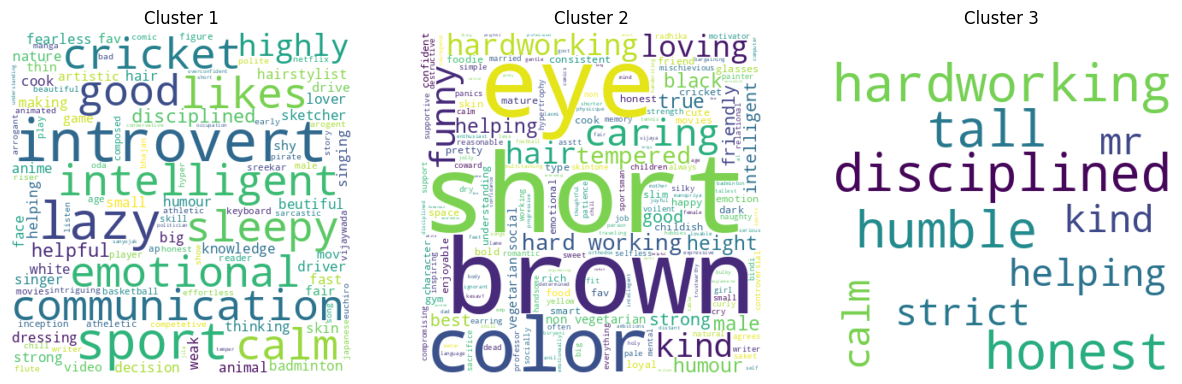

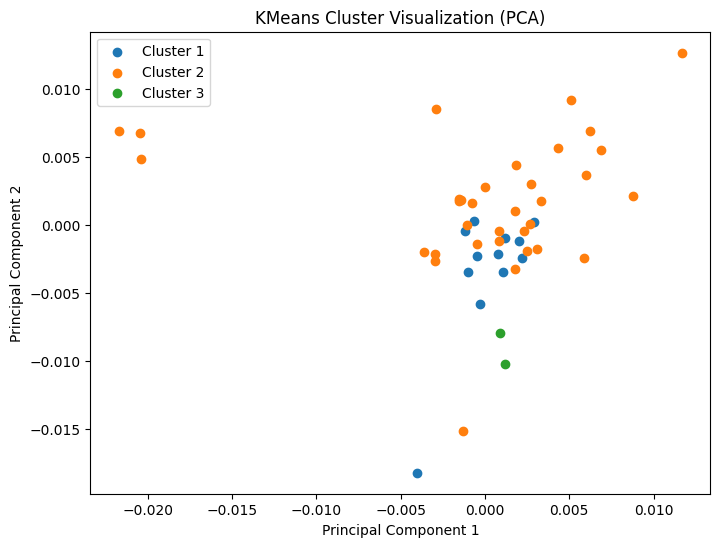

In [15]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans  # Importing KMeans

# Download necessary resources
nltk.download('stopwords')

# Assuming df is already defined. Example: df = pd.read_csv("your_data.csv")

# Text Preprocessing
text_data = df.iloc[:, 2:].fillna("").astype(str).apply(lambda x: " ".join(x), axis=1).tolist()

custom_stopwords = {"nan", "years", "kg", "sister", "nonvegetarian", "upma", "cm"}

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Split text into words based on whitespace
    all_stopwords = set(stopwords.words('english')).union(custom_stopwords)
    words = [word for word in words if word not in all_stopwords and len(word) > 1]
    return words

# Filter out empty texts
preprocessed_text = [preprocess_text(text) for text in text_data if text.strip()]

# Train Word2Vec Model
model = Word2Vec(sentences=preprocessed_text, vector_size=100, window=5, min_count=1, workers=4)

# Generate Document Vectors
document_vectors = []
cleaned_corpus = []

for document in preprocessed_text:
    word_vectors = [model.wv[word] for word in document if word in model.wv]
    if word_vectors:
        document_vectors.append(np.mean(word_vectors, axis=0))
        cleaned_corpus.append(document)
    else:
        document_vectors.append(np.zeros(model.vector_size))
        cleaned_corpus.append([])

X = np.array(document_vectors)

# Apply KMeans Clustering
k = 3
kmeans = KMeans(n_clusters=k, max_iter=100, tol=1e-4)  # Corrected to use n_clusters instead of k
kmeans.fit(X)

# Function to get top words per cluster
def get_top_words(centroid, model, top_n=10):
    words = list(model.wv.index_to_key)
    word_vectors = np.array([model.wv[word] for word in words])
    similarities = cosine_similarity([centroid], word_vectors)[0]
    top_indices = similarities.argsort()[-top_n:][::-1]
    return [words[i] for i in top_indices]

# Generate Word Clouds for Each Cluster
fig, axes = plt.subplots(1, k, figsize=(15, 5))

for i in range(k):
    cluster_indices = np.where(kmeans.labels_ == i)[0]  # Corrected to use labels_ instead of labels

    cluster_words = []
    for index in cluster_indices:
        cluster_words.extend(cleaned_corpus[index])

    word_freq = " ".join(cluster_words)

    wordcloud = WordCloud(width=400, height=400, background_color="white").generate(word_freq)

    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Cluster {i+1}")

plt.show()

# PCA for Cluster Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i+1}')

plt.legend()
plt.title("KMeans Cluster Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Attributes of Rohit: set()
Attributes of C: {'selfless', 'Good Memory', 'reasonable', 'Helping', 'relational', 'Smart', 'simple', 'agrees to everything', 'Supportive', 'Understanding', 'no emotions', 'Funny', 'Rich', 'Compromising'}
Jaccard Distance between Rohit and C: 1.0000


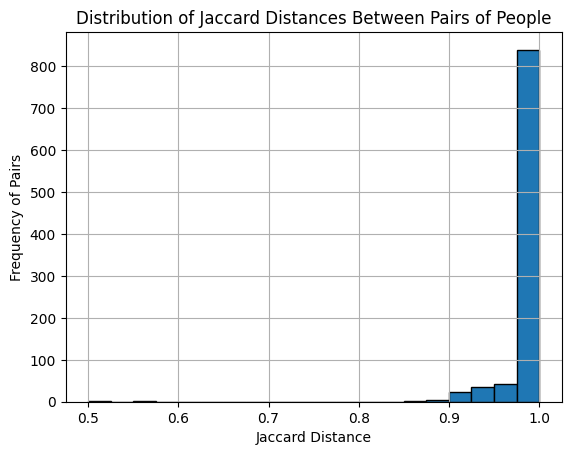

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from itertools import combinations


# Set of custom words to exclude
excluded_words = {
    "nan", "hobbies", "feet", "kg", "married", "vijayawada", "ap", "job", "new", "age",
    "non-vegetarian", "glasses", "govt", "bindi", "thing", "song", "sister", "eye", "cm",
    "those", "upma", "type", "who", "makes", "the", "to", "in", "and", "is", "not", "of",
    "telugu", "emp", "years"
}

# Clean and structure the data as a dictionary {Person: Set of Attributes}
df_clean = df.drop(columns=["Sno"]).set_index("Person").stack().reset_index(drop=True, level=1)
df_clean = df_clean.groupby("Person").apply(lambda x: set(val for val in x if val not in excluded_words and val==val))  # Remove nan and stopwords


# Function to calculate Jaccard distance
def calculate_jaccard_distance(set1, set2):
    intersection_count = len(set1.intersection(set2))
    union_count = len(set1.union(set2))
    return 1 - (intersection_count / union_count) if union_count != 0 else 1  # Handle empty sets

# Choose two people for comparison
person_a = "Rohit"
person_b = "C"

set_a = df_clean.get(person_a, set())
set_b = df_clean.get(person_b, set())

# Calculate the Jaccard distance
jaccard_result = calculate_jaccard_distance(set_a, set_b)

# Display the results
print(f"Attributes of {person_a}: {set_a}")
print(f"Attributes of {person_b}: {set_b}")
print(f"Jaccard Distance between {person_a} and {person_b}: {jaccard_result:.4f}")


# Calculate pairwise Jaccard distances for all persons
distance_list = []
for (person_a, set_a), (person_b, set_b) in combinations(df_clean.items(), 2):
    jaccard_result = calculate_jaccard_distance(set_a, set_b)
    distance_list.append(jaccard_result)

# Define Jaccard distance thresholds (from 0 to 1 in steps of 0.05)
threshold_range = np.arange(0, 1.05, 0.05)

# Plot the distribution of Jaccard distances
plt.hist(distance_list, bins=20, edgecolor='black')  # Adjusted bins for better representation
plt.xlabel('Jaccard Distance')
plt.ylabel('Frequency of Pairs')
plt.title('Distribution of Jaccard Distances Between Pairs of People')
plt.grid(True)
plt.show()
